<a href="https://colab.research.google.com/github/maulik-vyas/Tensors-Fundamentals/blob/main/Neural_Network_Classification_with_TensorFlow%20(Circles).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Neural Network Classification with TensorFlow

# Creating data to view and fit

In [58]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [59]:
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [60]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is hard to understand now, so let's visualize it

In [61]:
import pandas as pd

circles = pd.DataFrame({"X0": X[:,0], "X1": X[:,1], "label": y[:]})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


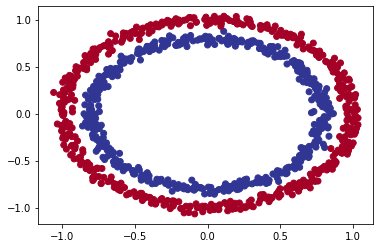

In [62]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [63]:
X.shape, y.shape

((1000, 2), (1000,))

**Model 1**

In [64]:
import tensorflow as tf

tf.random.set_seed(42)

model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["accuracy"])

model1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4820


In [65]:
# Let's try and improve our model by running it for longer

model1.fit(X, y, epochs=200)

Epoch 1/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4900
Epoch 2/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.4960
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.4470
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4880
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4800
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5050
Epoch 7/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6943 - accuracy: 0.4970
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4800
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4830
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4790
Epoch 11/

In [66]:
model1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

In [67]:
# Our model is getting around 50% accuracy so let's add an extra layer

In [68]:
tf.random.set_seed(42)

model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["accuracy"])

model2.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 1.8044 - accuracy: 0.5090
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7235 - accuracy: 0.5030
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7145 - accuracy: 0.4950
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7078 - accuracy: 0.5010
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7037 - accuracy: 0.5010
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7008 - accuracy: 0.4960
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7001 - accuracy: 0.4990
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6984 - accuracy: 0.4980
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.4960
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6962 - accuracy: 0.4920
Epoch 11/

In [69]:
model2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314204216003, 0.5]

In [70]:
# Model is still guessing so let's just add an activation function

In [71]:
tf.random.set_seed(42)

model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

model3.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 0.6998 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.4790
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6894 - accuracy: 0.4980
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6869 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6840 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6810 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6774 - accuracy: 0.5140
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6744 - accuracy: 0.5410
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6702 - accuracy: 0.5760
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6661 - accuracy: 0.5110
Epoch 11/

In [72]:
model3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.1275 - accuracy: 1.0000


[0.12751349806785583, 1.0]

In [73]:
model3.predict(X)[:5]

32/32 [==============================] - 0s 2ms/step


array([[0.90053576],
       [0.9527397 ],
       [0.8405967 ],
       [0.90390736],
       [0.09635698]], dtype=float32)

Model 4

In [74]:
tf.random.set_seed(42)

model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

model4.fit(X, y, epochs=100, verbose=0)

In [75]:
model4.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980254650115967, 0.5080000162124634]

In [76]:
model4.predict(X)[:5]

32/32 [==============================] - 0s 1ms/step


array([[0.48793232],
       [0.55887634],
       [0.56292886],
       [0.570507  ],
       [0.44141176]], dtype=float32)

In [77]:
import numpy as np

In [78]:
def plot_decision_boundary(model, X, y):

  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  x_in = np.c_[xx.ravel(), yy.ravel()]

  y_pred = model.predict(x_in)


  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
doing binary classification


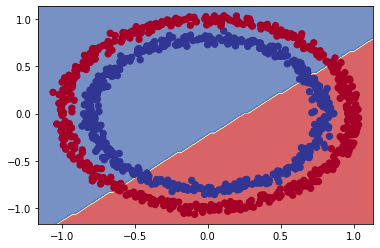

In [79]:
plot_decision_boundary(model=model4, 
                       X=X, 
                       y=y)

In [80]:
y_pred = model4.predict(X)

32/32 [==============================] - 0s 2ms/step


In [81]:
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

xx.shape

(100, 100)

In [82]:
y_pred.shape

(1000, 1)

Model 5

In [83]:
tf.random.set_seed(42)

model5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

model5.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics=["accuracy"])

history = model5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 3.6463 - accuracy: 0.4630
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 1.5734 - accuracy: 0.4790
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8241 - accuracy: 0.4900
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7819 - accuracy: 0.4860
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7589 - accuracy: 0.4890
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7423 - accuracy: 0.4870
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7305 - accuracy: 0.4890
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7206 - accuracy: 0.4900
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7136 - accuracy: 0.4920
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7080 - accuracy: 0.4920
Epoch 11/

313/313 [==============================] - 0s 1ms/step
doing binary classification


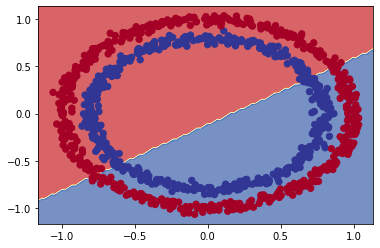

In [84]:
plot_decision_boundary(model=model5,
                       X=X,
                       y=y)

Model 6

In [85]:
tf.random.set_seed(42)

model6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(2, activation="relu"),
])

model6.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])

model6.fit(X, y, epochs=150)

Epoch 1/150
32/32 [==============================] - 1s 3ms/step - loss: 4.6672 - accuracy: 0.4960
Epoch 2/150
32/32 [==============================] - 0s 3ms/step - loss: 2.7608 - accuracy: 0.5030
Epoch 3/150
32/32 [==============================] - 0s 3ms/step - loss: 1.3489 - accuracy: 0.5030
Epoch 4/150
32/32 [==============================] - 0s 2ms/step - loss: 1.2069 - accuracy: 0.5010
Epoch 5/150
32/32 [==============================] - 0s 2ms/step - loss: 1.1676 - accuracy: 0.5030
Epoch 6/150
32/32 [==============================] - 0s 2ms/step - loss: 1.1333 - accuracy: 0.5040
Epoch 7/150
32/32 [==============================] - 0s 2ms/step - loss: 1.1027 - accuracy: 0.5060
Epoch 8/150
32/32 [==============================] - 0s 2ms/step - loss: 1.0745 - accuracy: 0.5070
Epoch 9/150
32/32 [==============================] - 0s 2ms/step - loss: 1.0491 - accuracy: 0.5090
Epoch 10/150
32/32 [==============================] - 0s 3ms/step - loss: 1.0253 - accuracy: 0.5060
Epoch 11/

In [86]:
model6.evaluate(X, y)

32/32 [==============================] - 1s 5ms/step - loss: 0.6494 - accuracy: 0.4990


[0.6494188904762268, 0.49900001287460327]

**Model 7**

In [87]:
tf.random.set_seed(42)

model7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(2, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model7.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])

model7.fit(X, y, epochs=150)

Epoch 1/150
32/32 [==============================] - 2s 2ms/step - loss: 0.6930 - accuracy: 0.5000
Epoch 2/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5030
Epoch 3/150
32/32 [==============================] - 0s 10ms/step - loss: 0.6925 - accuracy: 0.5000
Epoch 4/150
32/32 [==============================] - 0s 10ms/step - loss: 0.6922 - accuracy: 0.5070
Epoch 5/150
32/32 [==============================] - 0s 8ms/step - loss: 0.6918 - accuracy: 0.5110
Epoch 6/150
32/32 [==============================] - 0s 4ms/step - loss: 0.6915 - accuracy: 0.5370
Epoch 7/150
32/32 [==============================] - 0s 3ms/step - loss: 0.6910 - accuracy: 0.5070
Epoch 8/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6900 - accuracy: 0.5120
Epoch 9/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6885 - accuracy: 0.5280
Epoch 10/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6874 - accuracy: 0.5280
Epoch 1

In [88]:
model7.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0337 - accuracy: 0.9950


[0.03373635187745094, 0.9950000047683716]

313/313 [==============================] - 1s 2ms/step
doing binary classification


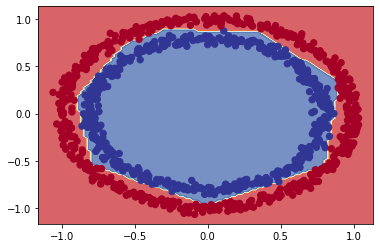

In [89]:
plot_decision_boundary(model7, X, y)

In [90]:
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

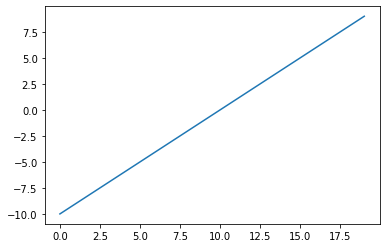

In [91]:
plt.plot(A)

In [92]:
def sigmoid(X):
  return 1 / (1 + tf.exp(-X))

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

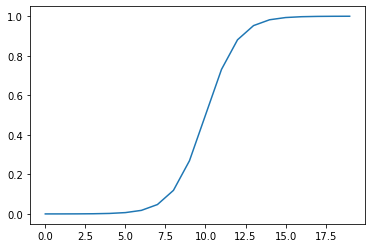

In [93]:
plt.plot(sigmoid(A))

In [94]:
def relu(x):
  return tf.maximum(0, x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

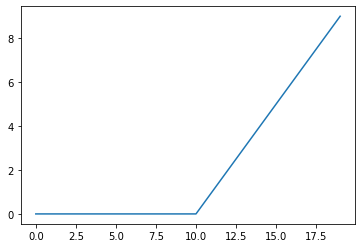

In [95]:
plt.plot(relu(A))

**Model 8**

In [96]:
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [97]:
tf.random.set_seed(42)

model8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model8.compile(loss=["binary_crossentropy"],
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics=["accuracy"])

history = model8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5714 - accuracy: 0.7738
Epoch 11/25
25/25 [

In [98]:
model8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000


[0.12468848377466202, 1.0]

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


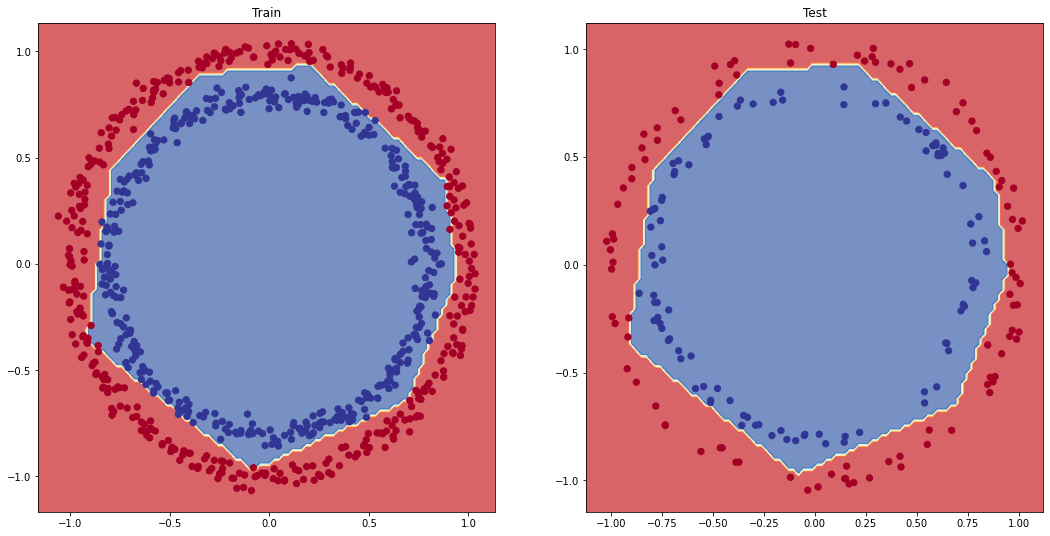

In [99]:
plt.figure(figsize=(18, 9))

plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model=model8, X=X_train, y=y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model=model8, X=X_test, y=y_test)

In [100]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673595,0.55125
3,0.668149,0.57750
4,0.663269,0.58500
5,0.654567,0.58375
6,0.641258,0.67500
7,0.626428,0.70125
8,0.603831,0.74875
9,0.571404,0.77375


Text(0.5, 1.0, 'model8 loss curve')

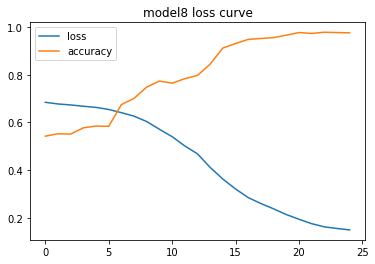

In [101]:
pd.DataFrame(history.history).plot()
plt.title("model8 loss curve")

Finding the best learning rate

In [102]:
tf.random.set_seed(42)

model9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model9.compile(loss=["binary_crossentropy"],
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

#create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history9 = model9.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6945 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6914 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

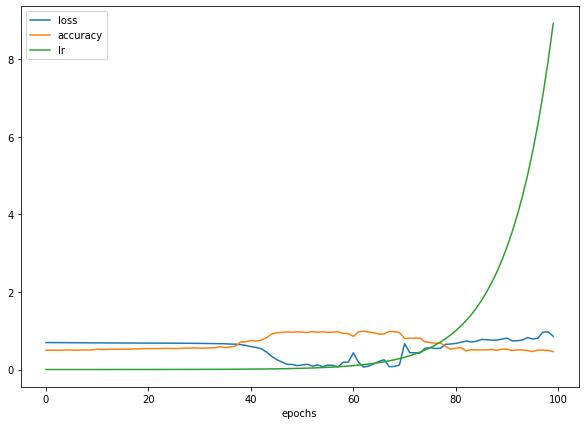

In [103]:
pd.DataFrame(history9.history).plot(figsize=(10, 7), xlabel="epochs")

Text(0.5, 1.0, 'Learning rate vs. loss')

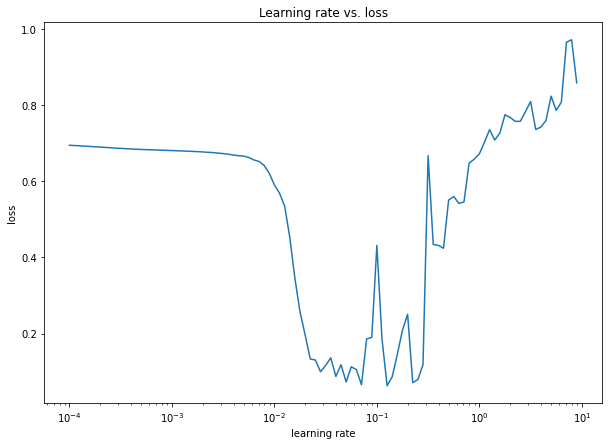

In [104]:
# Plot the learning rate vs loss curve
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history9.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("Learning rate vs. loss")

 Let's try creating new model with high learning rate

In [105]:
tf.random.set_seed(42)

model10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics="accuracy")

model10.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/25
25/25 [

In [106]:
model10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0463 - accuracy: 0.9900


[0.046285729855298996, 0.9900000095367432]

In [107]:
model8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1247 - accuracy: 1.0000


[0.12468848377466202, 1.0]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


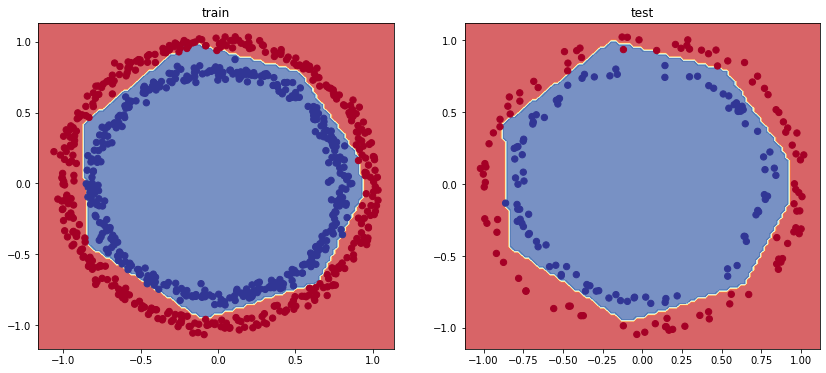

In [108]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.title("train")
plot_decision_boundary(model=model10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("test")
plot_decision_boundary(model=model10, X=X_test, y=y_test)
plt.show()

In [109]:
loss, accuracy = model10.evaluate(X_test, y_test)
print(f"model loss on the test set: {loss}")
print(f"model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.0463 - accuracy: 0.9900
model loss on the test set: 0.046285729855298996
model accuracy on the test set: 99.00%


In [113]:
# confusion matrix

from sklearn.metrics import confusion_matrix

y_pred = model10.predict(X_test)

confusion_matrix(y_test, tf.round(y_pred))

7/7 [==============================] - 0s 6ms/step


array([[100,   1],
       [  1,  98]])